# Гайд по визуализации данных в Julia

Подготовили студенты группы БЭК182 НИУ ВШЭ ОП "Экономика":
- Бадаева Санчир
- Оганесян Мария
- Сек Алексей

25.01.2021

## Содержание:
0. [Import CSV](#Import_CSV)
1. [Bar Plot](#Bar)
2. [Count Plot](#Count)
3. [Histogram](#Hist)
4. [Density Plot](#Density)
5. [Beeswarm Plot](#Bee)
6. [Hair Plot](#Hair)
7. [Pie Plot](#Pie)
8. [Box Plot](#Box)
9. [Heatmap Plot](#Heatmap)
10. [Violin Plot](#Violin)
11. [Line Plot](#Line)
12. [Scatter Plot](#Scatter)
13. [Bubble Plot](#Bubble)
14. [3D Surface Plot](#3D)

## Импорт CSV файлов в Julia и импорт библиотек <a id='Import_CSV'></a>

Краткий гайд по импорты CSV в Julia:
https://datatofish.com/import-csv-julia/


Сначала не получалось импортировать датасет, решение проблемы здесь:
https://discourse.julialang.org/t/csv-read-error-provide-a-valid-sink-argument/50157

In [ ]:
# Для работы библиотек - необходимо в терминале с открытой Julia вписать следующий команды (импорт библиотек):
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Dates")
Pkg.add("Plots")
Pkg.add("Gadfly")
Pkg.add("StatsPlots")
Pkg.add("Distributions")
Pkg.add("Statistics")
Pkg.add("VegaLite")

In [63]:
using CSV
using DataFrames
using Dates

Первый вариант импорта csv файлов

In [68]:
# Выведем первые 5 строк
df = CSV.read("tcs_stock.csv", DataFrame)
first(df, 5)

5×15 DataFrame
 Row │ Date        Symbol  Series  Prev Close  Open     High     Low      Last ⋯
     │ Date        String  String  Float64     Float64  Float64  Float64  Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2015-01-01  TCS     EQ         2558.25   2567.0  2567.0   2541.0   2550 ⋯
   2 │ 2015-01-02  TCS     EQ         2545.55   2551.0  2590.95  2550.6   2588
   3 │ 2015-01-05  TCS     EQ         2579.45   2581.0  2599.9   2524.65  2538
   4 │ 2015-01-06  TCS     EQ         2540.25   2529.1  2529.1   2440.0   2450
   5 │ 2015-01-07  TCS     EQ         2446.6    2470.0  2479.15  2407.45  2426 ⋯
                                                               8 columns omitted

Второй вариант импорта csv файлов

In [70]:
cl = DataFrame(CSV.File("Placement_Data_Full_Class.csv"));
first(cl, 5)

5×15 DataFrame
 Row │ sl_no  gender  ssc_p    ssc_b    hsc_p    hsc_b    hsc_s     degree_p   ⋯
     │ Int64  String  Float64  String   Float64  String   String    Float64    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  M         67.0   Others     91.0   Others   Commerce     58.0    ⋯
   2 │     2  M         79.33  Central    78.33  Others   Science      77.48
   3 │     3  M         65.0   Central    68.0   Central  Arts         64.0
   4 │     4  M         56.0   Central    52.0   Central  Science      52.0
   5 │     5  M         85.8   Central    73.6   Central  Commerce     73.3    ⋯
                                                               7 columns omitted

In [72]:
iris = DataFrame(CSV.File("Iris.csv"));
first(iris, 5)

5×6 DataFrame
 Row │ Id     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Specie ⋯
     │ Int64  Float64        Float64       Float64        Float64       String ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1            5.1           3.5            1.4           0.2  Iris-s ⋯
   2 │     2            4.9           3.0            1.4           0.2  Iris-s
   3 │     3            4.7           3.2            1.3           0.2  Iris-s
   4 │     4            4.6           3.1            1.5           0.2  Iris-s
   5 │     5            5.0           3.6            1.4           0.2  Iris-s ⋯
                                                                1 column omitted

### Подготовка данных для визуализации (эти переменные будут использоваться в нескольких графиках ниже, поэтому введем их сразу для всех)

In [74]:
cln = coalesce.(cl, 0)
cl_d = dropmissing(cl)

first(cl_d, 5)

5×15 DataFrame
 Row │ sl_no  gender  ssc_p    ssc_b    hsc_p    hsc_b    hsc_s     degree_p   ⋯
     │ Int64  String  Float64  String   Float64  String   String    Float64    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  M         67.0   Others     91.0   Others   Commerce     58.0    ⋯
   2 │     2  M         79.33  Central    78.33  Others   Science      77.48
   3 │     3  M         65.0   Central    68.0   Central  Arts         64.0
   4 │     5  M         85.8   Central    73.6   Central  Commerce     73.3
   5 │     8  M         82.0   Central    64.0   Central  Science      66.0    ⋯
                                                               7 columns omitted

## Bar Plot <a id='Bar_plot'></a>

In [76]:
# Подготовим данные для визуализации
using Statistics
cl_bar = cl[:, [:gender, :salary]]
cl_bar_new = coalesce.(cl_bar, 0)
grs = groupby(cl_bar_new, :gender);
bar_plot = combine(grs, :salary => mean, renamecols=false)

2×2 DataFrame
 Row │ gender  salary    
     │ String  Float64   
─────┼───────────────────
   1 │ M       2.15043e5
   2 │ F       1.68816e5

### Vertical Bar

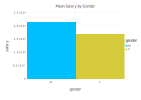

In [78]:
# Построим график
using Gadfly
Gadfly.plot(bar_plot, x=:gender, y=:salary, colour=:gender, Geom.bar, Guide.title("Mean Salary by Gender"))

### Horizontal Bar

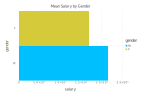

In [80]:
# Построим график
Gadfly.plot(bar_plot, x=:salary, y=:gender, colour=:gender, Geom.bar(orientation=:horizontal),
    Guide.title("Mean Salary by Gender"))

### Stacked Bar

In [82]:
# Подготовим данные для визуализации
cl_stacked_bar = cl[:, [:gender, :specialisation, :salary]]
cl_stacked_bar_new = coalesce.(cl_stacked_bar, 0)
grs_new = groupby(cl_stacked_bar_new, :gender);

m = grs_new[1]
m = m[:, [:specialisation, :salary]]
m = groupby(m, :specialisation);
M = combine(m, :salary => mean, renamecols=false)

f = grs_new[2]
f = f[:, [:specialisation, :salary]]
f = groupby(f, :specialisation);
F = combine(f, :salary => mean, renamecols=false)

M = insertcols!(M, 1, :gender => 'M')
F = insertcols!(F, 1, :gender => 'F')
MF = append!(M, F)
MF = DataFrame(gender = ["M", "M", "F", "F"], specialisation = ["Mkt&HR", "Mkt&Fin", "Mkt&Fin", "Mkt&HR"], 
    salary = [1.66429e5, 2.47843e5, 2.11351e5, 1.28462e5])

4×3 DataFrame
 Row │ gender  specialisation  salary   
     │ String  String          Float64  
─────┼──────────────────────────────────
   1 │ M       Mkt&HR          166429.0
   2 │ M       Mkt&Fin         247843.0
   3 │ F       Mkt&Fin         211351.0
   4 │ F       Mkt&HR          128462.0

In [84]:
# Построим график
Gadfly.plot(MF, x=:gender, y=:salary, colour=:specialisation, Geom.bar(position=:stack))

## Count Plot <a id='Count'></a>

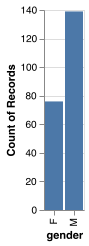

In [86]:
# Построим график
using VegaLite
cl |> @vlplot(:bar, x="gender:n", y="count()")

## Histogram <a id='Hist'></a>

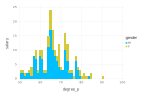

In [87]:
# Построим график
Gadfly.plot(cln, x=:degree_p, y=:salary, color=:gender, Geom.histogram(bincount=40))

### 2D Histogram

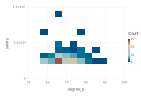

In [89]:
# Построим график
Gadfly.plot(cl_d, x=:degree_p, y=:salary, Geom.histogram2d(xbincount=9, ybincount=9))

## Density Plot <a id='Density'></a>

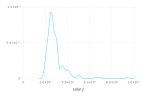

In [91]:
# Построим график
using Distributions
p1 = Gadfly.plot(cl_d, x=:salary, Geom.density)

In [93]:
# Построим график
p2 = Gadfly.plot(cl_d, x=:salary, color=:specialisation, Geom.density)

In [95]:
# Построим график
p3 = Gadfly.plot(cl_d, x=:salary, color=:degree_t, Geom.density)

### 2d Density Plot

In [97]:
# Подготовим данные для визуализации
X = rand(Rayleigh(2), 1000,2)
levelf(x) = maximum(x)*0.5.^collect(1:2:8)

levelf (generic function with 1 method)

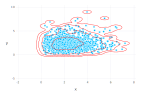

In [99]:
# Построим график
p1 = Gadfly.plot(x=X[:,1], y=X[:,2], Geom.density2d(levels=levelf),
    Geom.point, Scale.color_continuous(colormap=c->colorant"red"),
    Theme(key_position=:none))

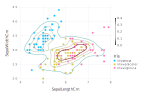

In [101]:
# Построим график
cs = repeat(Scale.default_discrete_colors(3), inner=50)
p2 = Gadfly.plot(iris, x=:SepalLengthCm, y=:SepalWidthCm,
    layer(x=:SepalLengthCm, y=:SepalWidthCm, color=cs),
    layer(Geom.density2d(levels=[0.1:0.1:0.4;]),  order=1),
    Scale.color_continuous, Guide.colorkey(title=""),
    Guide.manual_color_key("Iris", unique(iris.Species)),
    Theme(point_size=3pt, line_width=1.5pt))

## Beeswarm Plot <a id='Bee'></a>

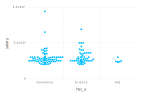

In [103]:
# Построим график
Gadfly.plot(cl, x=:hsc_s, y=:salary, Geom.beeswarm)

## Hair Plot <a id='Hair'></a>

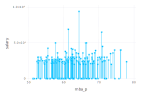

In [105]:
# Построим график
pb = Gadfly.plot(cln, x=:mba_p, y=:salary, Geom.hair, Geom.point)

## Pie Plot <a id='Pie'></a>

In [107]:
# Подготовим данные для визуализации (сгенерировали данные вручную)
x = ["1", "2", "3", "4", "5"]
y = 1:5

1:5

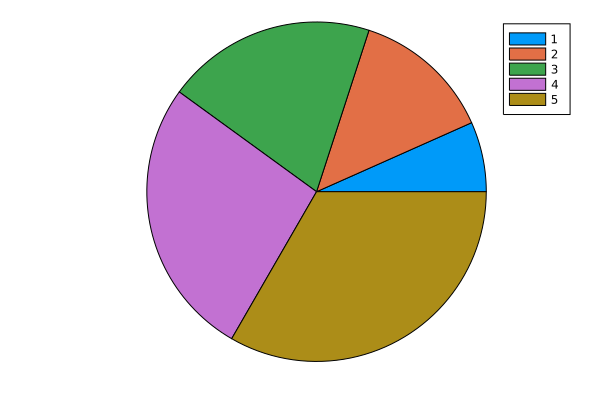

In [108]:
# Построим график
pie(x , y)

## Box Plot <a id='Box'></a>

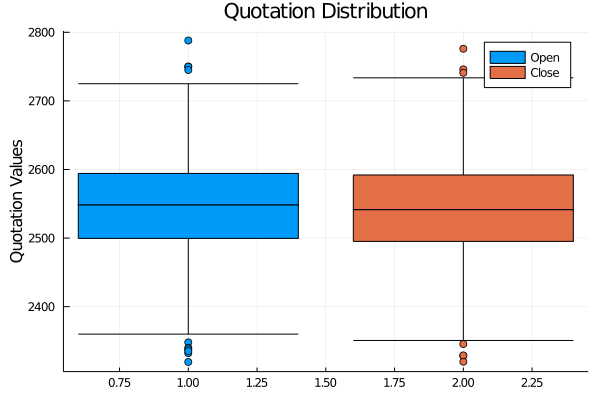

In [109]:
# Построим график
using  StatsPlots

boxplot([ df[:, :Open] df[:, :Close]], label= ["Open" "Close"], title = "Quotation Distribution", ylabel = "Quotation Values")

## Heatmap Plot <a id='Heatmap'></a>

In [110]:
# Подготовим данные для визуализации (сгенерировали случайные данные)
x = [string("x", i) for i = 1:10]
y = [string("y", i) for i = 1:10]
z = float((1:10) * reshape(1:10, 1, :)) #матрица 10х10

10×10 Array{Float64,2}:
  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
  2.0   4.0   6.0   8.0  10.0  12.0  14.0  16.0  18.0   20.0
  3.0   6.0   9.0  12.0  15.0  18.0  21.0  24.0  27.0   30.0
  4.0   8.0  12.0  16.0  20.0  24.0  28.0  32.0  36.0   40.0
  5.0  10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0   50.0
  6.0  12.0  18.0  24.0  30.0  36.0  42.0  48.0  54.0   60.0
  7.0  14.0  21.0  28.0  35.0  42.0  49.0  56.0  63.0   70.0
  8.0  16.0  24.0  32.0  40.0  48.0  56.0  64.0  72.0   80.0
  9.0  18.0  27.0  36.0  45.0  54.0  63.0  72.0  81.0   90.0
 10.0  20.0  30.0  40.0  50.0  60.0  70.0  80.0  90.0  100.0

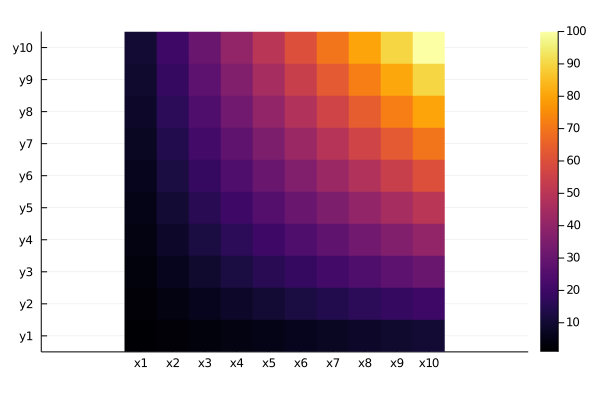

In [111]:
# Построим график
heatmap(x, y, z, aspect_ratio = 1)

## Violin Plot <a id='Violin'></a>

In [112]:
# Подготовим данные для визуализации
A=[df[:, :High], df[:, :Low]]

2-element Array{Array{Float64,1},1}:
 [2567.0, 2590.95, 2599.9, 2529.1, 2479.15, 2449.0, 2519.9, 2528.0, 2530.4, 2531.8  …  2445.0, 2434.2, 2450.0, 2440.0, 2435.0, 2438.2, 2466.4, 2465.3, 2459.0, 2448.5]
 [2541.0, 2550.6, 2524.65, 2440.0, 2407.45, 2420.55, 2450.0, 2480.25, 2480.1, 2500.5  …  2393.35, 2400.65, 2406.85, 2400.0, 2410.55, 2404.0, 2420.2, 2445.75, 2412.3, 2407.5]

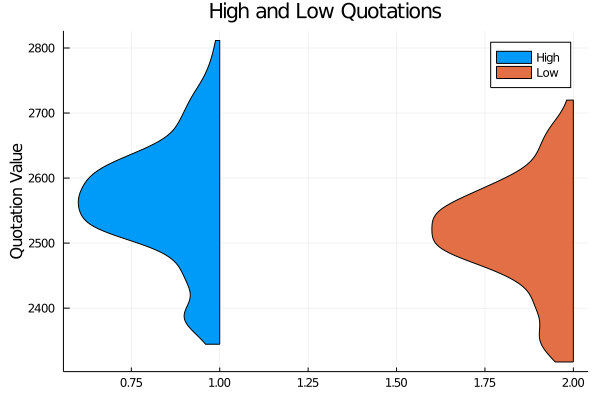

In [113]:
# Построим график
using StatsPlots

StatsPlots.violin(A,side=:left, ylabel = "Quotation Value", title = "High and Low Quotations", label = ["High" "Low"])

## Line Plot <a id='Line'></a>

In [114]:
# Подготовим данные для визуализации
y = df[:, :Close]
x = df[:, :Date]

y[1:5]

5-element Array{Float64,1}:
 2545.55
 2579.45
 2540.25
 2446.6
 2417.7

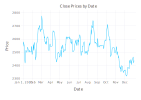

In [115]:
# Построим график
Gadfly.plot(df, x=:Date, y=:Close, Geom.line, Guide.title("Close Prices by Date"),
    Guide.xlabel("Date"), Guide.ylabel("Price"))

### LOESS 

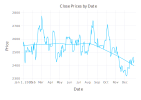

In [116]:
Gadfly.plot(df, x=:Date, y=:Close, Geom.line, Guide.title("Close Prices by Date"),
    Guide.xlabel("Date"), Guide.ylabel("Price"), Geom.smooth(method=:loess,smoothing=0.8))

### LM

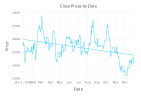

In [117]:
Gadfly.plot(df, x=:Date, y=:Close, Geom.line, Guide.title("Close Prices by Date"),
    Guide.xlabel("Date"), Guide.ylabel("Price"), Geom.smooth(method=:lm,smoothing=1.0))

## Scatter Plot <a id='Scatter'></a>

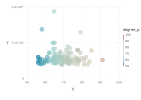

In [118]:
Gadfly.plot(cl_d, x=:degree_p, y=:salary, color=:degree_p, Geom.point, Guide.xlabel("X"), Guide.ylabel("Y"), 
    Theme(alphas=[0.5], continuous_highlight_color=identity, point_size=2mm))

### Layers

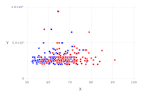

In [119]:
# Построим график
l1 = layer(cl_d, x=:degree_p, y=:salary, color=[colorant"red"], Geom.point)
l2 = layer(cl_d, x=:mba_p, y=:salary, color=[colorant"blue"], Geom.point)
Gadfly.plot(l1, l2, Guide.xlabel("X"), Guide.ylabel("Y"))

## Bubble Plot <a id='Bubble'></a>

In [120]:
# Подготовим данные для визуализации (сгенерировали случайные данные)
price = 100 .* rand(20)
quantity = 500 .* rand(20)
size_bub = round.(10 .* rand(20))

size_bub[1:5]

5-element Array{Float64,1}:
  0.0
  9.0
  1.0
 10.0
 10.0

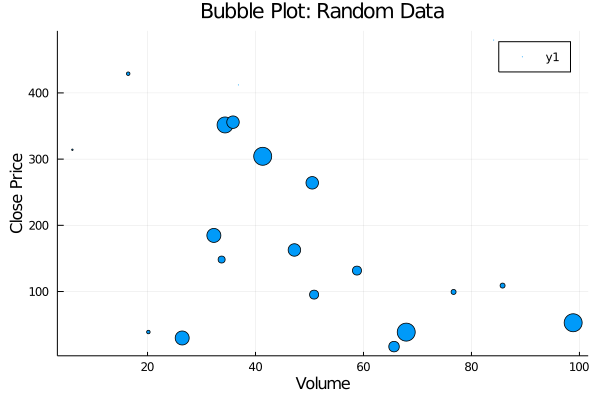

In [121]:
# Построим график

# Scatter plot with some custom settings
Plots.scatter(price, quantity, title="Bubble Plot: Random Data", xlabel="Volume", ylabel = "Close Price", m=size_bub)

## 3D Surface Plot <a id='3D'></a>

In [122]:
# Подготовим данные для визуализации
x=-1:0.01:1
y=-1:0.01:1
h(x,y)=x^5+y^2;

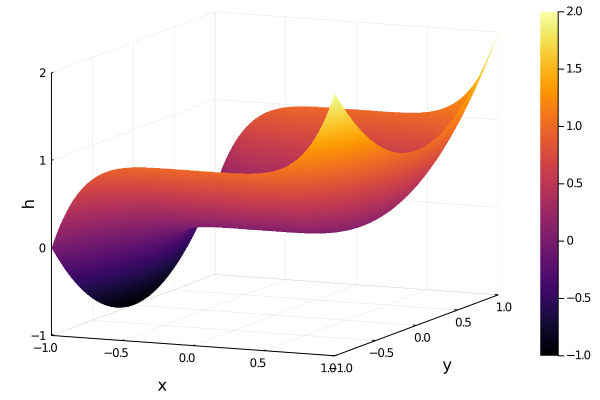

In [123]:
# Построим график
s = Plots.surface(x,y,h, xlabel="x", ylabel="y", zlabel="h")

### Список источников по общим принципам работы с данными в Julia и их визуализации:
1. https://github.com/JuliaAcademy/DataScience/blob/main/12.%20Visualization.ipynb
2. https://www.youtube.com/watch?v=SLE0vz85Rqo&list=PLP8iPy9hna6RT_Oz4ZflKdHTQEfxYU4h0&index=3
3. https://www.youtube.com/watch?v=-XvtUiNrCYM
4. https://habr.com/ru/post/423811/
5. https://habr.com/ru/company/edison/blog/506656/
6. https://towardsdatascience.com/data-visualization-with-julia-and-juno-47ec37dc567c
7. http://gadflyjl.org/v0.5/man/themes.html
8. https://docs.juliaplots.org/latest/generated/plotly/
9. https://docs.juliaplots.org/latest/tutorial/
10. https://coderoad.ru/28080066/Как-ссылаться-на-ячейку-записной-книжки-IPython-в-markdown

### Мы взяли несколько датасетов из открытых источников - ссылки на используемые датасеты:

1. Котировки акций на бирже в Индии, Мумбаи
https://www.kaggle.com/atulanandjha/national-stock-exchange-time-series
2. Iris Dataset
https://archive.ics.uci.edu/ml/datasets/Iris
3. Campus Placement Data
https://www.kaggle.com/benroshan/factors-affecting-campus-placement?select=Placement_Data_Full_Class.csv